## Task: Decision Tree on the MNIST dataset

Mimic the steps in the iris example. Use a decision tree again to train a classification model to identify handwritten digits using the popular MNIST dataset.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

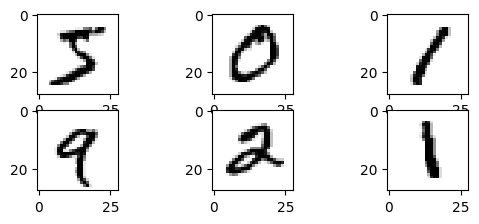

In [7]:
from matplotlib import pyplot as plt

image= mnist.data.to_numpy()
plt.subplot(431)
plt.imshow(image[0].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(432)
plt.imshow(image[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(433)
plt.imshow(image[3].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(434)
plt.imshow(image[4].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(435)
plt.imshow(image[5].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(436)
plt.imshow(image[6].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

In [8]:
from sklearn.model_selection import train_test_split

trX, teX, trY, teY = train_test_split(mnist.data, mnist.target, test_size=0.14)  # 70% data for training, 30% data for testing
assert(len(trX) == len(trY))
assert(len(teX) == len(teY))
print("# data points for training:", len(trX))
print("# data points for training:", len(teX))

# data points for training: 60199
# data points for training: 9801


In [48]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=15, min_samples_leaf=30)
dtc.fit(trX, trY)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",30
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curren

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def find_best_decision_tree(trX, trY, teX, teY, max_depth_range=range(1, 201, 20), min_samples_leaf_range=range(1, 201, 20)):
    """
    Grid search over max_depth and min_samples_leaf to find the best DecisionTreeClassifier.
    
    Parameters:
    -----------
    trX, trY : training data and labels
    teX, teY : test data and labels
    max_depth_range : range of max_depth values to try (default: 1-200 step 20)
    min_samples_leaf_range : range of min_samples_leaf values to try (default: 1-200 step 20)
    
    Returns:
    --------
    best_model : DecisionTreeClassifier with highest test accuracy
    best_params : dict with best hyperparameters
    best_accuracy : float, highest test accuracy achieved
    """
    best_model = None
    best_accuracy = 0.0
    best_params = {}
    
    total_combos = len(list(max_depth_range)) * len(list(min_samples_leaf_range))
    combo_count = 0
    
    for md in max_depth_range:
        for msl in min_samples_leaf_range:
            combo_count += 1
            if combo_count % 100 == 0 or combo_count == 1:
                print(f"Training {combo_count}/{total_combos}...", flush=True)
            
            clf = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, random_state=42)
            clf.fit(trX, trY)
            
            # Evaluate on test set
            test_acc = accuracy_score(teY, clf.predict(teX))
            
            if test_acc > best_accuracy:
                best_accuracy = test_acc
                best_model = clf
                best_params = {'max_depth': md, 'min_samples_leaf': msl}
                print(f"  New best: accuracy={test_acc:.4f} with max_depth={md}, min_samples_leaf={msl}")
    
    return best_model, best_params, best_accuracy

# Run the search
print("Starting hyperparameter search...")
dtc, best_params, best_acc = find_best_decision_tree(trX, trY, teX, teY)
print(f"\nBest parameters: {best_params}")
print(f"Best test accuracy: {best_acc:.4f}")


Starting hyperparameter search...
Training 1/100...
  New best: accuracy=0.2020 with max_depth=1, min_samples_leaf=1
  New best: accuracy=0.8759 with max_depth=21, min_samples_leaf=1
  New best: accuracy=0.8781 with max_depth=61, min_samples_leaf=1
Training 100/100...

Best parameters: {'max_depth': 61, 'min_samples_leaf': 1}
Best test accuracy: 0.8781


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# get estimation from the trained model (dtc)
trYPred = dtc.predict(trX)
teYPred = dtc.predict(teX)
# obtain accuracy
print('Accuracy of Decision Tree (Train): ', accuracy_score(trYPred, trY))
print('Accuracy of Decision Tree (Test):  ', accuracy_score(teYPred, teY))
# obtain other criteria
print(classification_report(teYPred, teY))

F1-Score on DecisionTreeClassifier(max_depth=5, min_samples_leaf=5): 0.654423
F1-Score on SVC(): 0.977655
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       925
           1       0.99      0.99      0.99      1114
           2       0.97      0.97      0.97      1007
           3       0.97      0.98      0.97      1028
           4       0.98      0.98      0.98       991
           5       0.97      0.97      0.97       847
           6       0.99      0.98      0.99       991
           7       0.98      0.97      0.97      1037
           8       0.98      0.97      0.98       927
           9       0.96      0.97      0.97       934

    accuracy                           0.98      9801
   macro avg       0.98      0.98      0.98      9801
weighted avg       0.98      0.98      0.98      9801

